# Olist E-commerce Exploratory Data Analysis
### BY : CHIBUIKE JOHN UBANI
    
    

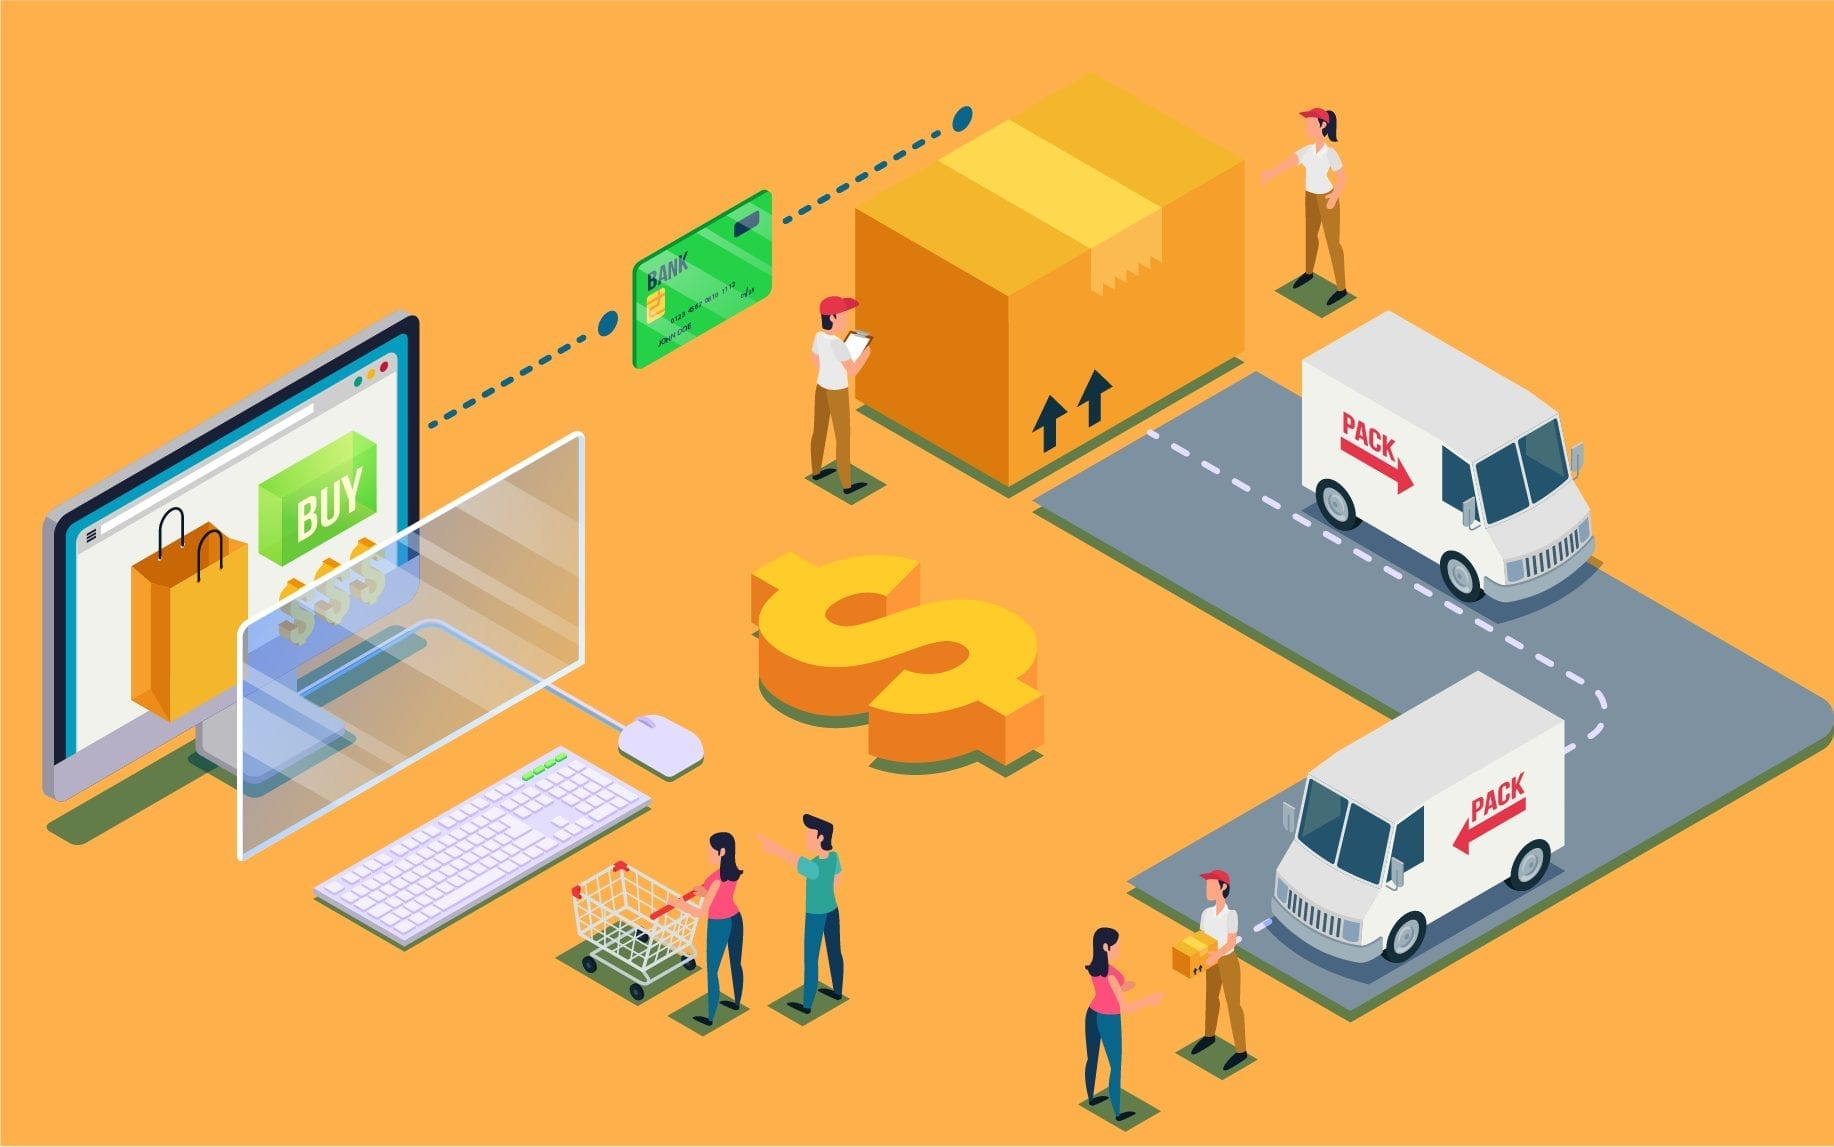




### Problem Statement
Olist is a Brazilian e-commerce platform that connects small and medium-sized businesses to customers across Brazil. The platform operates as a marketplace, where merchants can list their products and services and customers can browse and purchase them online.

The Olist sales dataset is a collection of anonymized data about orders placed on the Olist from September 2016 to September 2018. It contains a wide range of information about each order, including the order date, product details, payment and shipping information, customer and seller IDs, and customer reviews. The dataset also includes information about the sellers who list their products on Olist, as well as data on customer behavior and demographics. The dataset is designed to help analysts and researchers better understand the e-commerce landscape in Brazil and identify opportunities for growth and optimization.

In this notebook, I will help Olist gain better insights into their e-commerce platform and optimize available opportunities for growth, by providing answers to the business questions below:

1. What is the total revenue generated by Olist, and how has it changed over time?
2. How many orders were placed on Olist, and how does this vary by month?
3. What are the most popular product categories on Olist, and how do their sales volumes compare to each other?
4. What is the average order value (AOV) on Olist, and how does this vary by product category and payment method?
5. Who are the top active sellers on olist?
6. What is the distribution of seller ratings on Olist, and how does this impact sales performance?
7. How many customers have made repeat purchases on Olist, and what percentage of total sales do they account for?
8. What is the average customer rating for products sold on Olist, and how does this impact sales performance?
9. What is the total order cancellation on Olist, and how does this impact the company's revenue?
10. Which payment methods are most commonly used by Olist customers
11. Which product categories have the highest revenue on Olist, and how can the company increase revenue across different categories?
12. What Geolocation has high customer density?

____________________________________________________________________________________________________________________________

### Data Dictionary

#### 1. olist_customers_dataset.csv
* customer_id: unique identifier for each customer
* customer_unique_id: unique identifier for each customer (anonymized)
* customer_zip_code_prefix: zip code prefix of the customer's address
* customer_city: city where the customer is located
* customer_state: state where the customer is located

#### 2. olist_geolocation_dataset.csv
* geolocation_zip_code_prefix: zip code prefix for the location
* geolocation_lat: latitude of the location
* geolocation_lng: longitude of the location
* geolocation_city: city of the location
* geolocation_state: state of the location

#### 3. olist_orders_dataset.csv
* order_id: unique identifier for each order
* customer_id: unique identifier for the customer who placed the order
* order_status: current status of the order (e.g. delivered, shipped, canceled)
* order_purchase_timestamp: date and time when the order was placed
* order_approved_at: date and time when the payment for the order was approved
* order_delivered_carrier_date: date and time when the order was handed over to the carrier
* order_delivered_customer_date: date and time when the order was delivered to the customer
* order_estimated_delivery_date: estimated date when the order is expected to be delivered

#### 4. olist_order_items_dataset.csv
* order_id: unique identifier for the order
* order_item_id: unique identifier for each item within an order
* product_id: unique identifier for the product being ordered
* seller_id: unique identifier for the seller who listed the
* product shipping_limit_date: date and time when the seller has to ship the product
* price: price of the product
* freight_value: shipping fee for the product

#### 5. olist_order_payments_dataset.csv
* order_id: unique identifier for the order
* payment_sequential: index number for each payment made for an order
* payment_type: type of payment used for the order (e.g. credit card, debit card, voucher)
* payment_installments: number of installments in which the payment was made
* payment_value: value of the payment made

#### 6. olist_products_dataset.csv
* product_id: unique identifier for each product
* product_category_name: name of the category that the product belongs to
* product_name_lenght: number of characters in the product name
* product_description_lenght: number of characters in the product description
* product_photos_qty: number of photos for the product
* product_weight_g: weight of the product in grams
* product_length_cm: length of the product in centimeters
* product_height_cm: height of the product in centimeters
* product_width_cm: width of the product in centimeters

#### 7. olist_sellers_dataset.csv
* seller_id: unique identifier for each seller
* seller_zip_code_prefix: zip code prefix for the seller's location
* seller_city: city where the seller is located
* seller_state: state where the seller is located

#### 8. product_category_name_translation.csv
* product_category_name: name of the product category in Portuguese
* product_category_name_english: name of the product category in English

#### 9. olist_order_reviews_dataset.csv
* review_id: unique identifier for each review
* order_id: unique identifier for the order that the review is associated with
* review_score: numerical score (1-5) given by the customer for the product
* review_comment_title: title of the review comment
* review_comment_message: text of the review comment
* review_creation_date: date and time when the review was created
* review_answer_timestamp: date and time when the seller responded to the review (if applicable)

Note: The review comment fields (i.e. review_comment_title and review_comment_message) are optional, and may not be present in all reviews.

## Dataset Relationship


| Table Name                        | Related Columns                                  | Related Table               |
|---------------------------------  |--------------------------------------------------|-----------------------------|
| olist_customers_dataset           | customer_id                                      | olist_orders_dataset        |
| olist_orders_dataset              | customer_id, order_id                            | olist_customers_dataset     |
| olist_orders_dataset              | order_id                                         | olist_order_items_dataset   |
| olist_order_items_dataset         | order_id                                         | olist_orders_dataset        |
| olist_order_items_dataset         | product_id, seller_id                            | olist_products_dataset      |
| olist_order_payments_dataset      | order_id                                         | olist_orders_dataset        |
| olist_products_dataset            | product_id                                       | olist_order_items_dataset   |
| olist_sellers_dataset             | seller_id                                        | olist_order_items_dataset   |
| product_category_name_translation | product_category_name                            | olist_products_dataset      |
| olist_order_reviews_dataset       | order_id                                         | olist_orders_dataset        |

This table represents the relationships between the different tables based on their related columns. It indicates which columns in one table are related to the primary key or foreign key columns in another table. These relationships allow me to join the tables together and perform queries or analysis that involve multiple tables.

### Importing relevant libraries

In [2]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading each dataset

In [3]:
customer_df1 = pd.read_csv('olist_customers_dataset.csv')
geolocation_df2 = pd.read_csv('olist_geolocation_dataset.csv')
orders_df3 = pd.read_csv('olist_orders_dataset.csv')
orderitems_df4 = pd.read_csv('olist_order_items_dataset.csv')
orderpayments_df5 = pd.read_csv('olist_order_payments_dataset.csv')
products_df6 = pd.read_csv('olist_products_dataset.csv')
sellers_df7 = pd.read_csv('olist_sellers_dataset.csv')
productcategoryname_df8 = pd.read_csv('product_category_name_translation.csv')
orderreviews_df9 = pd.read_csv('olist_order_reviews_dataset.csv')

In [4]:
#Testing if the SQL queries work
# specify globals() or locals() using the following helper function
mysql = lambda q: sqldf(q, globals())
sqldf ("SELECT * FROM customer_df1 LIMIT 5;")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
query = '''
SELECT c.customer_city, c.customer_state, o.order_status
FROM customer_df1 AS c
INNER JOIN
orders_df3 AS o
ON c.customer_id = o.customer_id;
'''

sqldf(query)

,customer_city,customer_state,order_status
0,franca,SP,delivered
1,sao bernardo do campo,SP,delivered
2,sao paulo,SP,delivered
3,mogi das cruzes,SP,delivered
4,campinas,SP,delivered
...,...,...,...
99436,sao paulo,SP,delivered
99437,taboao da serra,SP,delivered
99438,fortaleza,CE,delivered
99439,canoas,RS,delivered


## Knowing the data

#### 1. Customer_df1

In [6]:
customer_df1.info()

customer_df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### 2. Geolocation_df2

In [7]:
geolocation_df2.info()

geolocation_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### 3. Orders_df3

In [8]:
orders_df3.info()

orders_df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### 4. Orderitems_df4

In [9]:
orderitems_df4.info()

orderitems_df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### 5. Orderpayments_df5

In [10]:
orderpayments_df5.info()

orderpayments_df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### 6. Products_df6

In [11]:
products_df6.info()

products_df6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### 7. Sellers_df7

In [12]:
sellers_df7.info()

sellers_df7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### 8. Productcategoryname_df8

In [13]:
productcategoryname_df8.info()

productcategoryname_df8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### 9. Orderreviews_df9

In [14]:
orderreviews_df9.info()

orderreviews_df9.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Data Observation and Preparation

In [15]:
# Checking for duplicate data one at a time from df1 - df9

dup = customer_df1.duplicated().any()
dup

print("Are there duplicate data in the dataset?", dup)

Are there duplicate data in the dataset? False


In [16]:
#Checking for NaN values
nan_df = products_df6[products_df6.isna().any(axis=1)]
nan_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [17]:
# Check for missing values in the entire DataFrame one at a time
missing_values = orderreviews_df9.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


### Observation : 

1. There were no duplicates from all the files df1 - df9.

2. I found NaN values

3. I checked for missing values where its null and found in df3, df6, df9.

##### For df3 - olist orders dataset:
* order approved at               -  160
* order delivered carrier date    - 1783
* order delivered customer date   - 2965

##### For df6 - olist products dataset:
* product category name        - 610
* product name lenght          - 610
* product description lenght   - 610
* product photos qty           - 610
* product weight g             -  2
* product length cm            -  2
* product height cm            -  2
* product width cm             -  2    
    
##### For df6 - olist_orders_dataset:
* review comment title       - 88285
* review comment message     - 58247

 
Solution to my observations: Depending on which table i will be using to answer any of the business question i will clean accordingly.

## Starting with the orders_df3 table to start answering the business questions

In [18]:
# 1. Remove the timestamp by creating a new column showing just the date
orders_df3['order_purchase_date'] = orders_df3['order_purchase_timestamp'].apply(lambda x: x[0:10])

# 2. Change the new date column to datetime datatype
orders_df3['order_purchase_date'] = pd.to_datetime(orders_df3['order_purchase_date'])

# 3. Create a new dataframe, with only the needed columns
orders_df33 = orders_df3.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                             'order_delivered_customer_date','order_estimated_delivery_date'], axis = 1)
# Verify the result
orders_df33.head()

,order_id,customer_id,order_status,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13


In [19]:
orderpayments_df5.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Merge both orders_df33 and orderpayments_df5 dataframe

In [20]:
# Merged the tables based on a common column
orders_and_orderpayments_merged_df = pd.merge(orders_df33, orderpayments_df5, on='order_id')

#Verify result
orders_and_orderpayments_merged_df.info()
orders_and_orderpayments_merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_id              103886 non-null  object        
 1   customer_id           103886 non-null  object        
 2   order_status          103886 non-null  object        
 3   order_purchase_date   103886 non-null  datetime64[ns]
 4   payment_sequential    103886 non-null  int64         
 5   payment_type          103886 non-null  object        
 6   payment_installments  103886 non-null  int64         
 7   payment_value         103886 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 7.1+ MB


,order_id,customer_id,order_status,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,1,credit_card,3,179.12


## Check and Clean the merged dataframe

In [21]:
# Check for missing values in the entire DataFrame one at a time
missing_values = orders_and_orderpayments_merged_df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

order_id                0
customer_id             0
order_status            0
order_purchase_date     0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [22]:
# Checking for duplicate data

dup = orders_and_orderpayments_merged_df.duplicated().any()
dup

print("Are there duplicate data in the dataset?", dup)

Are there duplicate data in the dataset? False


In [23]:
# Get unique values in order_status
unique_values = orders_and_orderpayments_merged_df['order_status'].unique()
print(unique_values)

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [24]:
# Drop canceled and unavailable order_status rows because it means the order was not finalized and the company did not generate any revenue from those orders.
orders_and_orderpayments_merged_df = orders_and_orderpayments_merged_df[~orders_and_orderpayments_merged_df['order_status'].isin(['canceled', 'unavailable'])]

In [25]:
# Checking to confirm dropped values with SQL query
query = '''
SELECT DISTINCT order_status FROM orders_and_orderpayments_merged_df;

'''

sqldf(query)

,order_status
0,delivered
1,invoiced
2,shipped
3,processing
4,created
5,approved


## Answering the business questions

### 1: What is the total revenue generated by Olist, and how has it changed over time?


In [26]:
#The total revenue generated by Olist is $15.74 million
query = '''
SELECT ROUND(SUM(payment_value) / 1000000, 2) AS Total_Revenue_Millions
FROM orders_and_orderpayments_merged_df;

'''

sqldf(query)

,Total_Revenue_Millions
0,15.74


In [27]:
#Create a quartely time period for the payment value

#1. create a new dataframe with only the order purchase date and payment value columns 
revenue_trend = orders_and_orderpayments_merged_df.loc[:,['order_purchase_date', 'payment_value']]

#2. set the order_purchase_date as the index of the dataframe
revenue_trend = revenue_trend.set_index('order_purchase_date')

#3. Group the order_puchase_date by quarter and find the sum of payment value for each quarter
monthly_total_revenue = revenue_trend.resample('M', closed='right').agg({'payment_value': 'sum'})

# Show result
monthly_total_revenue

,payment_value
order_purchase_date,
2016-09-30,136.23
2016-10-31,51657.53
2016-11-30,0.00
2016-12-31,19.62
2017-01-31,137006.76
2017-02-28,283621.94
2017-03-31,425656.40
2017-04-30,405988.38
2017-05-31,582926.16


In [28]:
#The highest monthly revenue

monthly_total_revenue.max()

payment_value    1172639.23
dtype: float64

In [29]:
# Using math to calculate some specific payment value
import math

result = 136.23 + 51657.53 + 0.00 + 19.62

print(result)

51813.380000000005


##### Find the trend of revenue and how it has changed overtime, then visualize it

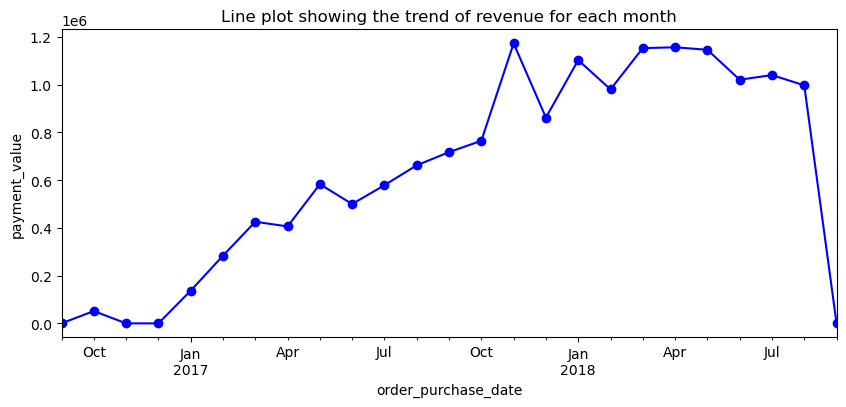

In [30]:
# Group the data by month and calculate the total revenue
monthly_revenue = orders_and_orderpayments_merged_df.groupby(pd.Grouper(key='order_purchase_date', freq='M'))['payment_value'].sum()

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 4))
monthly_revenue.plot(kind='line', marker='o', linestyle='-', color='blue')

# Plot the trend of revenue over time
plt.xlabel('order_purchase_date')
plt.ylabel('payment_value')
plt.title("Line plot showing the trend of revenue for each month")

# Display the plot
plt.show()

This chart shows the total payment value for orders made on a monthly basis and is grouped by order_purchase_date, which is the date when the orders were made.

According to the chart, the highest payment value was recorded in Nov 2017 , with a payment value of 1,172,639.23. The lowest total payment value was recorded in 2016 (i.e., September all through to December), with a total payment value of 51,813.38 and September 2018 with the value of 166.46. Overall, it appears that the total payment value increased from January 2017 to August 2018, before decreasing.

The chart provides insight into the amount of revenue generated by orders made on a monthly basis from September 2016 to September 2018, which can help the company identify growth opportunities, expand their customer base, and improve overall business performance.

### 2. How many orders were placed on Olist, and how does this vary by month or season?

In [31]:
# Drop rows with 'canceled' or 'unavailable' order_status
orders_df33 = orders_df33[~orders_df33['order_status'].isin(['canceled', 'unavailable'])]

In [32]:
# Checking to confirm dropped values with SQL query

query = '''
SELECT DISTINCT order_status FROM orders_df33;

'''

sqldf(query)

,order_status
0,delivered
1,invoiced
2,shipped
3,processing
4,created
5,approved


### a) The total number of orders placed on Olist

In [33]:
# Calculate the total number of orders
total_orders = len(orders_df33)

# Print the total number of orders
print("Total number of orders placed on Olist:", total_orders)

Total number of orders placed on Olist: 98207


### b) Find the trend of orders placed monthly

In [34]:
#1. create a new dataframe with only the order_id columns and order purchase date
orders_placed_trend = orders_df33.loc[:,['order_id', 'order_purchase_date']]

#2. set the order_purchase_date as the index of the dataframe
orders_placed_trend = orders_placed_trend.set_index('order_purchase_date')

#3. Rename the column of the dataframe
orders_placed_trend = orders_placed_trend.rename(columns = {'order_id' : 'order_id_count'})

#4. Group the order_puchase_date by quarter and find the count of each quarter
monthly_order_placed = orders_placed_trend.resample('M').agg({'order_id_count': 'count'})

# Show result
monthly_order_placed

,order_id_count
order_purchase_date,
2016-09-30,2
2016-10-31,293
2016-11-30,0
2016-12-31,1
2017-01-31,787
2017-02-28,1718
2017-03-31,2617
2017-04-30,2377
2017-05-31,3640


##### Visualize the trend of orders and how it vary by month

<Figure size 1000x400 with 0 Axes>

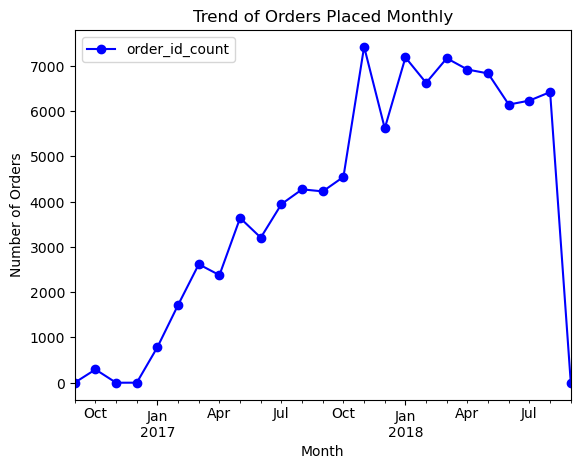

In [35]:
# Create a line plot to visualize the trend
plt.figure(figsize=(10, 4))
monthly_order_placed.plot(kind='line', marker='o', linestyle='-', color='blue')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Trend of Orders Placed Monthly')

# Display the plot
plt.show()

The line chart visualizes the number of orders placed each month from September 2016 to September 2018. The data reveals a fluctuating pattern, starting with just 2 orders in September 2016 and reaching a peak of 7,423 orders in November 2017. After a decline in December 2017, the number of orders rises again to 7,187 in January 2018, followed by a gradual decrease until September 2018, where only one order is recorded.

By leveraging this information, Olist can tailor marketing strategies to drive repeat purchases and customer loyalty and also ensure enough stock is available during high-demand months while minimizing excess inventory during slower periods, reducing holding costs and improving cash flow.

### 3. What are the most popular product categories on Olist, and how do their sales volumes compare to each other?

In [36]:
#Joining both products_df6 and productcategoryname_df8 using the product_category_name column
#Then join the result of this to the orderitems_df4 using the product_id column

query = '''
SELECT *
FROM products_df6
INNER JOIN productcategoryname_df8
ON products_df6.product_category_name = productcategoryname_df8.product_category_name
INNER JOIN orderitems_df4
ON products_df6.product_id = orderitems_df4.product_id

'''

sqldf(query)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_category_name_english,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,artes,art,5236307716393b7114b53ee991f36956,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,esporte_lazer,sports_leisure,01f66e58769f84129811d43eefd187fb,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,bebes,baby,143d00a4f2dde4e0364ee1821577adb3,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,utilidades_domesticas,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,informatica_acessorios,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
111019,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,informatica_acessorios,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111020,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,informatica_acessorios,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
111021,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,informatica_acessorios,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


In [37]:
#showing the unique values from the sql query
unique_values = sqldf(query)['product_category_name_english'].unique()

#show the result
for value in unique_values:
    print(value)

perfumery
art
sports_leisure
baby
housewares
musical_instruments
cool_stuff
furniture_decor
home_appliances
toys
bed_bath_table
construction_tools_safety
computers_accessories
health_beauty
luggage_accessories
garden_tools
office_furniture
auto
electronics
fashion_shoes
telephony
stationery
fashion_bags_accessories
computers
home_construction
watches_gifts
construction_tools_construction
pet_shop
small_appliances
agro_industry_and_commerce
furniture_living_room
signaling_and_security
air_conditioning
consoles_games
books_general_interest
costruction_tools_tools
fashion_underwear_beach
fashion_male_clothing
kitchen_dining_laundry_garden_furniture
industry_commerce_and_business
fixed_telephony
construction_tools_lights
books_technical
home_appliances_2
party_supplies
drinks
market_place
la_cuisine
costruction_tools_garden
fashio_female_clothing
home_confort
audio
food_drink
music
food
tablets_printing_image
books_imported
small_appliances_home_oven_and_coffee
fashion_sport
christmas_supp

In [38]:
# Group the product_category_name_english by its categories and find the count of each category
category_sales = sqldf(query).groupby('product_category_name_english')['product_category_name_english'].count().sort_values(ascending=False)

#Show the result
category_sales

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

##### Visualize the sales volume 

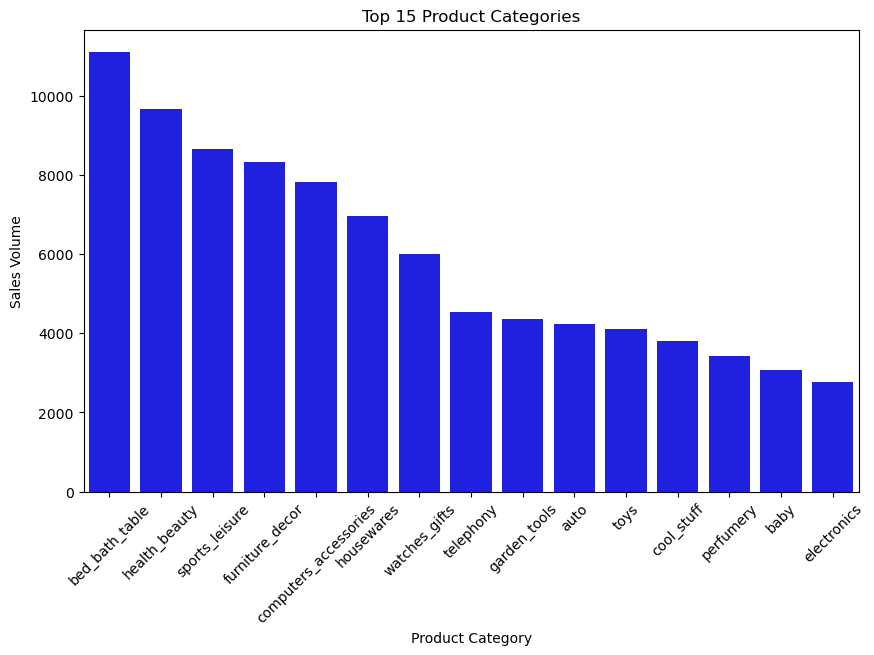

In [39]:
# Select the top 15 product categories
top_15_categories = category_sales.head(15)

# Convert the result to a DataFrame
top_15_categories_df = top_15_categories.reset_index(name='count')

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='count', data=top_15_categories_df, color='blue')

# Set plot labels and title
plt.xlabel('Product Category')
plt.ylabel('Sales Volume')
plt.title('Top 15 Product Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Based on the chart, bed_bathe_table tops the list as the most popular product category with 11,115 sale volumes out of the 71 categories. It is followed by other popular categories such as health_beauty, sport_leisure, furniture_decor, computer_accessories.

### 4. What is the average order value (AOV) on Olist, and how does this vary by product category or payment method?

In [71]:
#Used the merged data from the first solution to find the average, i use the payment value
# A) The average order value is 153.44

query = '''
SELECT ROUND(AVG(payment_value), 2) AS Average_Order_Value
FROM orders_and_orderpayments_merged_df;

'''
sqldf(query)

,Average_Order_Value
0,153.44


In [41]:
#Getting the average order value by product category

query = '''
SELECT pcn.product_category_name_english, (SUM(op.payment_value)/COUNT(o.order_id)) AS avg_order_value
FROM orders_df3 o
JOIN orderpayments_df5 op ON o.order_id = op.order_id
JOIN orderitems_df4 oi ON o.order_id = oi.order_id
JOIN products_df6 p ON oi.product_id = p.product_id
JOIN productcategoryname_df8 pcn ON p.product_category_name = pcn.product_category_name
GROUP BY 1
ORDER BY 2 DESC;

'''
sqldf(query)


,product_category_name_english,avg_order_value
0,computers,1268.734318
1,fixed_telephony,763.875498
2,small_appliances_home_oven_and_coffee,656.786154
3,agro_industry_and_commerce,471.153214
4,home_appliances_2,464.789030
...,...,...
66,fashion_underwear_beach,88.295417
67,food,88.267433
68,cds_dvds_musicals,85.673571
69,flowers,67.060909


##### a) Visualize how it varies by product category

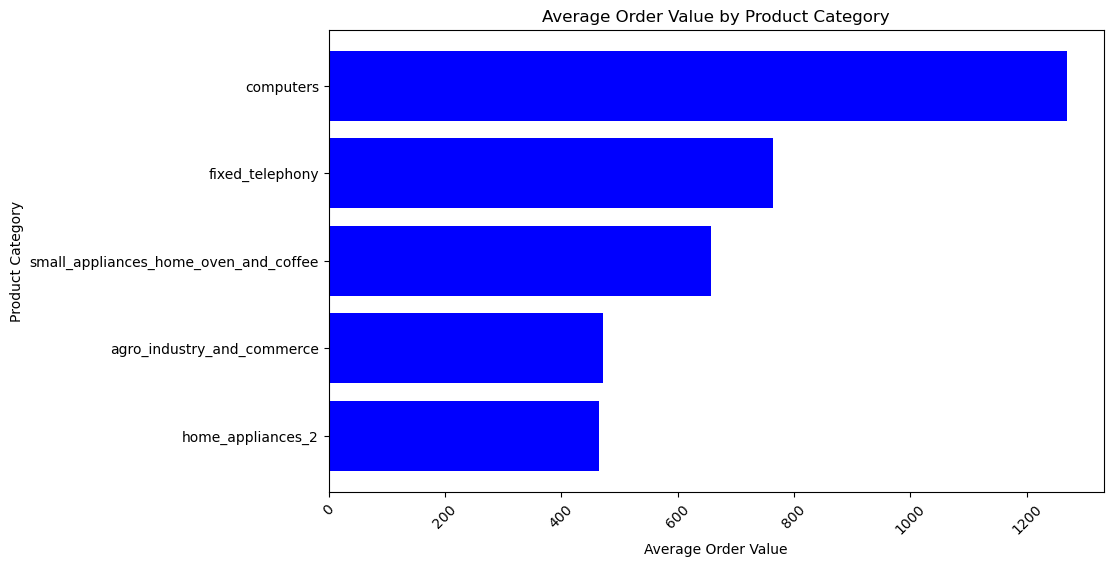

In [42]:
# Select the top 15 product categories
top_products_categories = sqldf(query).head()

# Convert the result to a DataFrame
top_products_categories_df = top_15_categories.reset_index(name='count')

# Sort the DataFrame by average order value in ascending order
top_products_categories = top_products_categories.sort_values('avg_order_value', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_products_categories['product_category_name_english'], top_products_categories['avg_order_value'], color='blue')

# Set plot labels and title
plt.xlabel('Average Order Value')
plt.ylabel('Product Category')
plt.title('Average Order Value by Product Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [124]:
# B) The average order value by payment method

query = '''
SELECT DISTINCT payment_type, ROUND(AVG(payment_value), 2) AS average_order_value
FROM orders_and_orderpayments_merged_df
GROUP BY 1
ORDER BY 2 DESC;

'''
sqldf(query)

,payment_type,average_order_value
0,credit_card,162.70
1,boleto,144.67
2,debit_card,140.12
3,voucher,62.33


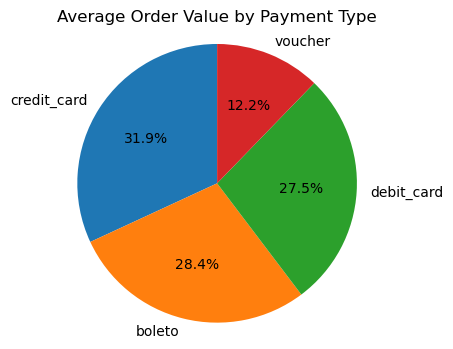

In [44]:
#Pie chart showing the payment type

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sqldf(query)['average_order_value'], labels=sqldf(query)['payment_type'], autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Average Order Value by Payment Type')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

Credit cards emerge as the most preferred payment method among Olist customers, reflecting their widespread acceptance and convenience. The second most popular payment option is boleto, which holds significant popularity in Brazil. Debit cards follow closely behind, while voucher payments appear to be the least utilized method among customers.

### 5. How many sellers are active on Olist, and how does this number change over time?

In [45]:
# In this query, i use the strftime function to extract the year from the order_purchase_timestamp column. 
# I then join the sellers, order_items, and orders tables based on the corresponding columns. 
# Next, i group the data by the year and count the distinct seller IDs. 
# Finally, i order the result by the year in ascending order.

query = '''
SELECT strftime('%Y', o.order_purchase_timestamp) AS year,
       COUNT(DISTINCT s.seller_id) AS active_sellers
FROM sellers_df7 s
JOIN orderitems_df4 oi ON s.seller_id = oi.seller_id
JOIN orders_df3 o ON oi.order_id = o.order_id
GROUP BY year
ORDER BY year ASC;

'''
sqldf(query)

,year,active_sellers
0,2016,145
1,2017,1784
2,2018,2383


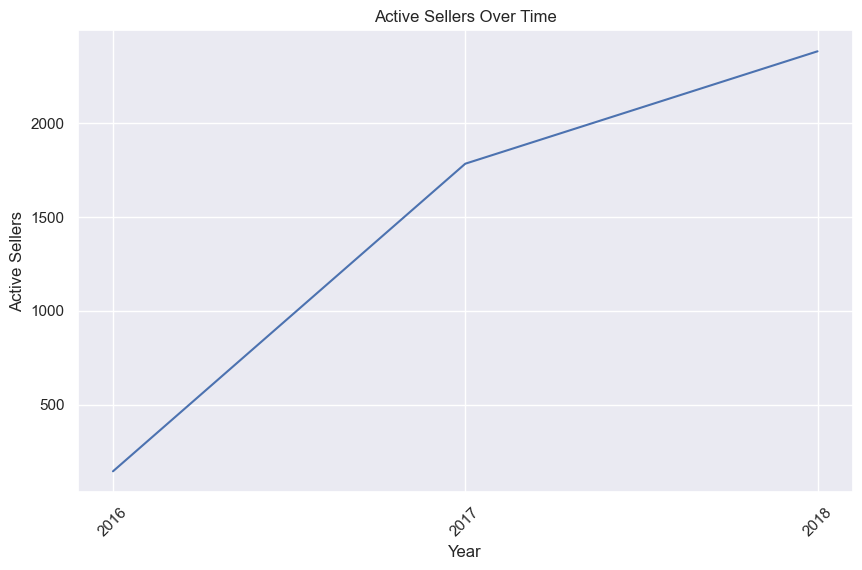

In [46]:
#Visualize how the number has changed overtime

# Convert the result to a DataFrame
active_sellers_df = sqldf(query)
active_sellers_df['count'] = active_sellers_df.index

# Sort the DataFrame by date
active_sellers_df = active_sellers_df.sort_values('year')

# Set the plot style
sns.set(style="darkgrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='active_sellers', data=active_sellers_df)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Active Sellers')
plt.title('Active Sellers Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Over the years, the number of active sellers has witnessed a significant growth. In 2016, there were 145 sellers actively participating in the marketplace. The following year, in 2017, this number surged to 1784 sellers, indicating a substantial increase. However, it was in 2018 that the highest number of sellers was recorded, reaching a remarkable count of 2383.

### 6: What is the distribution of seller ratings on Olist, and how does this impact sales performance?

In [47]:
# I will be joining the order items and order review table

query = '''
WITH Seller_Rating_Distribution AS (
    SELECT CASE WHEN review_score = 5 THEN '5 Stars'
                WHEN review_score = 4 THEN '4 Stars'
                WHEN review_score = 3 THEN '3 Stars'
                WHEN review_score = 2 THEN '2 Stars'
                WHEN review_score = 1 THEN '1 Star'
                END AS seller_rating, oi.seller_id, COUNT(*) AS order_count
    FROM orderitems_df4 oi
    JOIN orderreviews_df9 r ON oi.order_id = r.order_id
    GROUP BY oi.seller_id
    ORDER BY seller_rating DESC
)
SELECT seller_rating, COUNT(DISTINCT(seller_id)) AS count
FROM Seller_Rating_Distribution
GROUP BY seller_rating
ORDER BY seller_rating ASC

'''

sqldf(query)

,seller_rating,count
0,1 Star,468
1,2 Stars,89
2,3 Stars,241
3,4 Stars,515
4,5 Stars,1782


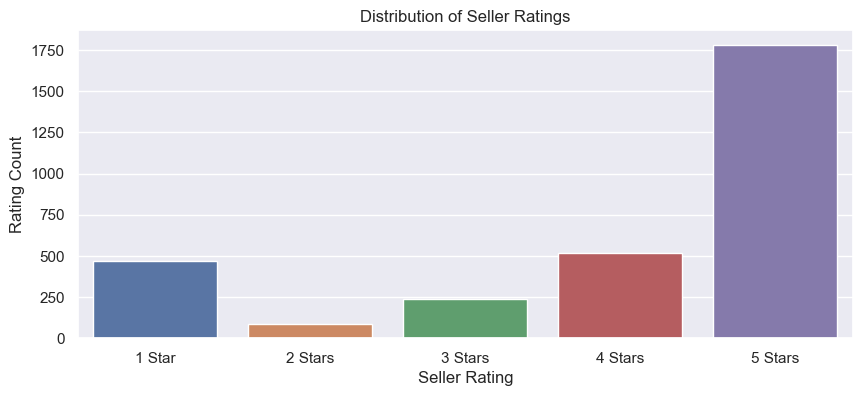

In [48]:
# Set the style
sns.set(style="darkgrid")

# Plot the distribution of seller ratings
plt.figure(figsize=(10, 4))
sns.barplot(x='seller_rating', y='count', data=sqldf(query),)

# Set plot labels and title
plt.xlabel('Seller Rating')
plt.ylabel('Rating Count')
plt.title('Distribution of Seller Ratings')

# Display the plot
plt.show()

From the chart above, the top average rating is 5 stars followed by 4 stars, 1 star, 3 stars and 2 stars.

In [49]:
# Getting the Seller rating by sales performance
# I joined order items, order reviews and order payments table to get the result
# Then created a temporary table using CTE and queried it

query = '''
WITH Sales_Rating_Revenue AS (
    SELECT CASE WHEN review_score = 5 THEN '5 Stars'
                WHEN review_score = 4 THEN '4 Stars'
                WHEN review_score = 3 THEN '3 Stars'
                WHEN review_score = 2 THEN '2 Stars'
                WHEN review_score = 1 THEN '1 Star'
                END AS seller_rating, oi.seller_id, AVG(op.payment_value) total_revenue, COUNT(*) AS order_count
    FROM orderitems_df4 oi
    JOIN orderreviews_df9 r ON oi.order_id = r.order_id
    JOIN orderpayments_df5 op ON oi.order_id = op.order_id
    GROUP BY oi.seller_id
    ORDER BY seller_rating DESC
)
SELECT seller_rating, total_revenue
FROM Sales_Rating_Revenue
GROUP BY 1
ORDER BY 1 ASC
'''
sqldf(query)


,seller_rating,total_revenue
0,1 Star,88.543000
1,2 Stars,1128.342857
2,3 Stars,45.882500
3,4 Stars,207.004355
4,5 Stars,161.396429


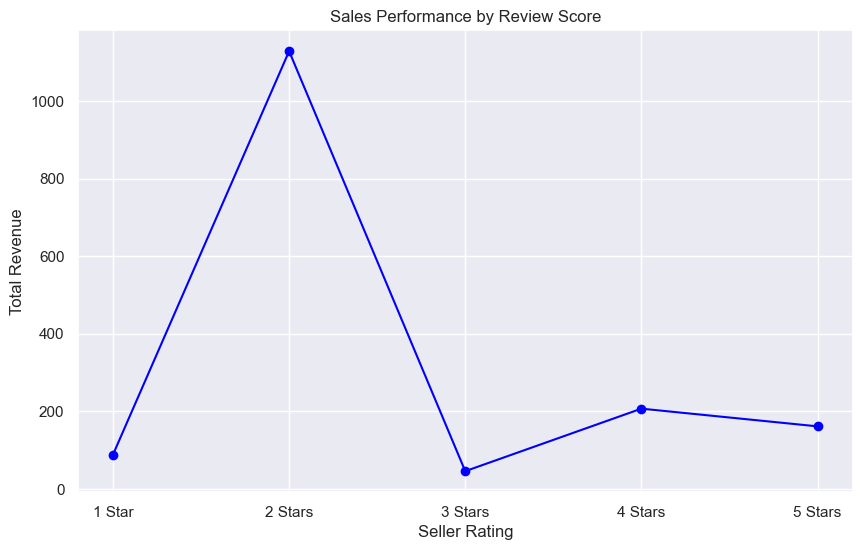

In [50]:
# Plot the impact of seller ratings on sales performance
plt.figure(figsize=(10, 6))
plt.plot(sqldf(query)['seller_rating'], sqldf(query)['total_revenue'], marker='o', color='blue')
plt.xlabel('Seller Rating')
plt.ylabel('Total Revenue')
plt.title('Sales Performance by Review Score')
plt.show()

Based on the plot, seller ratings with 2 stars have more revenue than other stars and in that order its 4 stars, 5 stars, 1 star and 3 stars being the lowest.
The reasons for lower-rated sellers having higher revenue may vary depending on the specific circumstances and dynamics of the marketplace.

### 7: How many customers have made repeat purchases on Olist, and what percentage of total sales do they account for?

In [51]:
# The rows that came back is 2997, which is the number of repeat customers.
# The query is based on their unique_customer_id, order_id and payment_value as (total spent)

query = '''
SELECT c.customer_unique_id, COUNT(DISTINCT o.order_id) AS OrderCount, ROUND(SUM(payment_value), 2) AS total_spent
FROM orders_df3 o
JOIN customer_df1 c ON o.customer_id = c.customer_id
JOIN orderpayments_df5 op ON o.order_id = op.order_id
GROUP BY c.customer_unique_id
HAVING COUNT(DISTINCT o.order_id) > 1
ORDER BY 2 DESC;

'''
sqldf(query)

,customer_unique_id,OrderCount,total_spent
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,927.63
1,3e43e6105506432c953e165fb2acf44c,9,1172.66
2,ca77025e7201e3b30c44b472ff346268,7,1122.72
3,6469f99c1f9dfae7733b25662e7f1782,7,758.83
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01
...,...,...,...
2992,00a39521eb40f7012db50455bf083460,2,123.25
2993,0058f300f57d7b93c477a131a59b36c3,2,175.58
2994,004b45ec5c64187465168251cd1c9c2f,2,147.72
2995,004288347e5e88a27ded2bb23747066c,2,354.37


In [52]:
#The total sales of percentage accounted for the repeat customers is 6%

query = '''
WITH repeat_customers AS (
SELECT c.customer_unique_id, COUNT(DISTINCT o.order_id) AS OrderCount, ROUND(SUM(payment_value), 2) AS total_spent
FROM orders_df3 o
JOIN customer_df1 c ON o.customer_id = c.customer_id
JOIN orderpayments_df5 op ON o.order_id = op.order_id
GROUP BY c.customer_unique_id
HAVING COUNT(DISTINCT o.order_id) > 1
)
SELECT COUNT(DISTINCT rc.customer_unique_id) AS numb_repeat_customers,
ROUND(SUM(rc.total_spent) / (SELECT SUM(payment_value) FROM orderpayments_df5), 2) * 100 AS repeat_cust_sales_perc
FROM repeat_customers rc;

'''
sqldf(query)

,numb_repeat_customers,repeat_cust_sales_perc
0,2997,6.0


### 8: What is the average customer rating for products sold on Olist, and how does this impact sales performance?

In [53]:
# The average customer rating is 4
query = '''

SELECT ROUND(AVG(review_score)) AS average_customer_rating
FROM orderreviews_df9;

'''
sqldf(query)

,average_customer_rating
0,4.0


In [54]:
#How does it impact sales performance

query = '''
SELECT r.review_score, COUNT(o.order_id) AS order_count, ROUND(SUM(o.price)) AS total_revenue
FROM orderitems_df4 o
JOIN orderreviews_df9 r ON o.order_id = r.order_id
GROUP BY 1
ORDER BY 2 DESC;

'''
sqldf(query)

,review_score,order_count,total_revenue
0,5,63626,7713984.0
1,4,21381,2540744.0
2,1,14787,1888271.0
3,3,9544,1050811.0
4,2,3984,459374.0


Based on the findings, the average customer rating of 4 significantly contributes to the overall revenue, securing the second-highest position. This particular rating category generates a substantial sum of 2,540,744, highlighting its notable impact on the company's sales performance.

### 9:  What is the average order cancellation rate on Olist, and how does this impact seller performance?

In [55]:
#The average order cancelation rate on Olist is 0.63%

query = '''

SELECT
ROUND(CAST(COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) AS FLOAT) / COUNT(*) * 100,2) AS cancelation_rate
FROM orders_df3

'''
sqldf(query)

,cancelation_rate
0,0.63


In [56]:
#The impact of sellers performance based on their cancellation rate

query = '''
SELECT
ROUND(CAST(COUNT(CASE WHEN ord.order_status = 'canceled' THEN 1 END) AS FLOAT) / COUNT(*) * 100,2) AS cancelation_rate,
ROUND(CAST(COUNT(CASE WHEN ord.order_status = 'delivered' THEN 1 END) AS FLOAT) / COUNT(*) * 100,2) AS delivery_rate,
COUNT(DISTINCT oi.order_id) AS numb_of_orders, ROUND(SUM(op.payment_value),2) AS amount_lost, seller_id
FROM orders_df3 ord
JOIN orderitems_df4 oi ON ord.order_id = oi.order_id
JOIN orderpayments_df5 op ON ord.order_id = op.order_id
GROUP BY seller_id;

'''
sqldf(query)

,cancelation_rate,delivery_rate,numb_of_orders,amount_lost,seller_id
0,0.00,100.00,3,2748.06,0015a82c2db000af6aaaf3ae2ecb0532
1,0.00,97.93,200,48349.22,001cca7ae9ae17fb1caed9dfb1094831
2,100.00,0.00,1,267.94,001e6ad469a905060d959994f1b41e4f
3,0.00,98.28,51,2445.64,002100f778ceb8431b7a1020ff7ab48f
4,0.00,100.00,1,139.38,003554e2dce176b5555353e4f3555ac8
...,...,...,...,...,...
3090,100.00,0.00,1,79.52,ffcfefa19b08742c5d315f2791395ee5
3091,0.00,100.00,18,3607.52,ffdd9f82b9a447f6f8d4b91554cc7dd3
3092,0.00,100.00,14,2259.55,ffeee66ac5d5a62fe688b9d26f83f534
3093,1.61,95.16,60,12834.27,fffd5413c0700ac820c7069d66d98c89


Understanding the impact of cancellation rates on seller performance is crucial. One scenario to consider is when a seller has a higher delivery rate compared to their cancellation rate or the number of products ordered. Let's take the example of seller ID - fffd5413c0700ac820c7069d66d98c89. This seller has a cancellation rate of 1.61% and a delivery rate of 95.16%. It indicates that the majority of their orders out of the 60 orders are successfully delivered, with only a small percentage being canceled.

On the other hand, there is seller ID - 001e6ad469a905060d959994f1b41e4f, who has a 100% cancellation rate, but this is based on just one order. This situation raises concerns as the single order placed was canceled. Sellers in such cases should carefully review their product reviews to identify the reasons behind the cancellations and take necessary measures to address any issues.

In summary, sellers should pay close attention to their cancellation rates. A higher delivery rate than cancellation rate is desirable for better performance. Monitoring product reviews can provide valuable insights into the reasons for cancellations, allowing sellers to make improvements and enhance their overall performance.

### 10: What are the top-selling products on Olist, and how have their sales trends changed over time?

In [57]:
#Getting the the top selling products on Olist, fitered by delivered status

query = '''
SELECT p.product_category_name, ROUND(SUM(op.payment_value), 2) AS total_revenue,
COUNT(DISTINCT oi.order_id) AS number_orders, strftime('%Y', o.order_purchase_timestamp) AS year
FROM orders_df3 o
JOIN orderpayments_df5 op ON o.order_id = op.order_id
JOIN orderitems_df4 oi ON o.order_id = oi.order_id
JOIN products_df6 p ON oi.product_id = p.product_id
GROUP BY 1
HAVING order_status = 'delivered'
ORDER BY 2 DESC;

'''
sqldf(query)

,product_category_name,total_revenue,number_orders,year
0,cama_mesa_banho,1712553.67,9417,2018
1,beleza_saude,1657373.12,8835,2017
2,informatica_acessorios,1585330.45,6689,2017
3,moveis_decoracao,1430176.39,6449,2017
4,relogios_presentes,1429216.68,5624,2018
...,...,...,...,...
64,flores,2213.01,29,2017
65,pc_gamer,2174.43,8,2017
66,casa_conforto_2,1710.54,24,2017
67,cds_dvds_musicais,1199.43,12,2017


In [58]:
# Merged the sql result with the product category name
#My aim is to delete the portugese column and leave just the english

products_category_merged_df = pd.merge(sqldf(query), productcategoryname_df8, on='product_category_name')


#Verify result
products_category_merged_df.head(10)

,product_category_name,total_revenue,number_orders,year,product_category_name_english
0,cama_mesa_banho,1712553.67,9417,2018,bed_bath_table
1,beleza_saude,1657373.12,8835,2017,health_beauty
2,informatica_acessorios,1585330.45,6689,2017,computers_accessories
3,moveis_decoracao,1430176.39,6449,2017,furniture_decor
4,relogios_presentes,1429216.68,5624,2018,watches_gifts
5,esporte_lazer,1392127.56,7720,2017,sports_leisure
6,utilidades_domesticas,1094758.13,5884,2017,housewares
7,automotivo,852294.33,3897,2018,auto
8,ferramentas_jardim,838280.75,3518,2017,garden_tools
9,cool_stuff,779698.00,3632,2018,cool_stuff


In [59]:
# Drop the Portugese product category name
products_category_merged_df = products_category_merged_df.drop('product_category_name', axis=1)

# Print the updated DataFrame

print(products_category_merged_df)

    total_revenue  number_orders  year product_category_name_english
0      1712553.67           9417  2018                bed_bath_table
1      1657373.12           8835  2017                 health_beauty
2      1585330.45           6689  2017         computers_accessories
3      1430176.39           6449  2017               furniture_decor
4      1429216.68           5624  2018                 watches_gifts
..            ...            ...   ...                           ...
62        2326.17             23  2018         arts_and_craftmanship
63        2213.01             29  2017                       flowers
64        1710.54             24  2017                home_comfort_2
65        1199.43             12  2017             cds_dvds_musicals
66         324.51              2  2017         security_and_services

[67 rows x 4 columns]


###  visualize the product sales trends over time

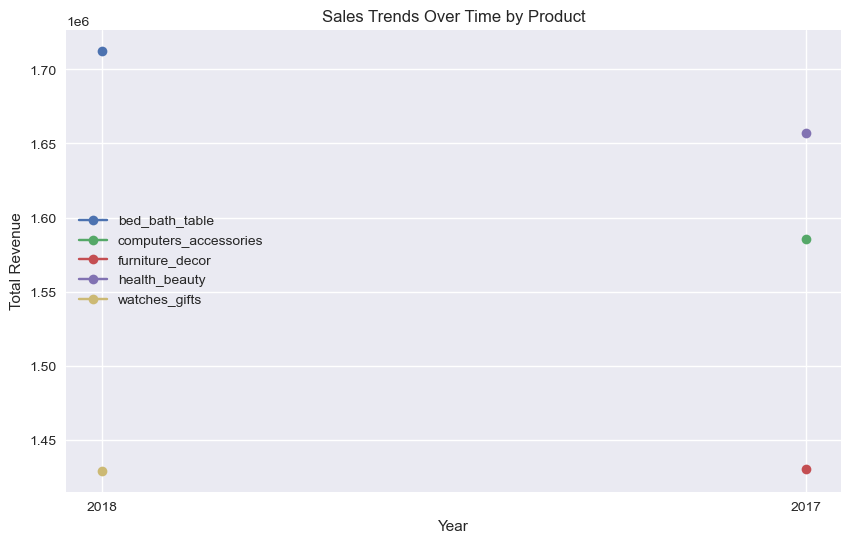

In [60]:
# Select the top 5 product
top_5_products = products_category_merged_df.head(5)

# Convert the result to a DataFrame
df = pd.DataFrame(top_5_products)

# Set the plot style
plt.style.use('seaborn')

# Create the line plot
plt.figure(figsize=(10, 6))
for category, group in df.groupby('product_category_name_english'):
    plt.plot(group['year'], group['total_revenue'], marker='o', label=category)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Sales Trends Over Time by Product')
plt.legend()

# Display the plot
plt.show()

From the trend it shows that bed_bathe_table is the top selling product in 2018 followed by watches_gifts.
While in 2017 health_beauty was the highest, seconded by computer_accesories and lastly furniture_decor.
This result is based on the Top 5 by the revenue and year.

### 11: Which payment methods are most commonly used by Olist customers, and how does this vary by product category or geographic region?

In [61]:
# A) The payment method commonly used by Olist customers
query = '''
SELECT payment_type, COUNT(DISTINCT order_id) AS payment_count
FROM orderpayments_df5
GROUP BY 1
ORDER BY 2 DESC;

'''
sqldf(query)

,payment_type,payment_count
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


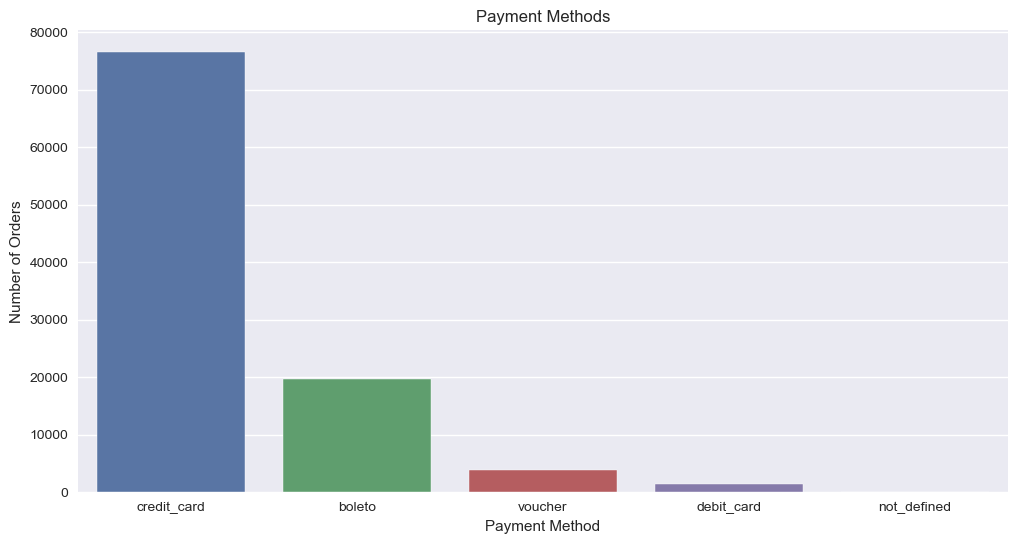

In [62]:
# Payment method visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_type', y='payment_count', data=sqldf(query))
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.title('Payment Methods')
plt.show()

In [63]:
# B) The payment method by product category

query = '''
SELECT op.payment_type, pcn.product_category_name_english, COUNT( oi.order_id) AS numb_orders
FROM orderitems_df4 oi
JOIN products_df6 p ON oi.product_id = p.product_id 
JOIN orderpayments_df5 op ON oi.order_id = op.order_id
JOIN productcategoryname_df8 pcn ON p.product_category_name = pcn.product_category_name
GROUP BY 1, 2
ORDER BY 3 DESC;

'''
sqldf(query)

,payment_type,product_category_name_english,numb_orders
0,credit_card,bed_bath_table,8959
1,credit_card,health_beauty,7566
2,credit_card,sports_leisure,6635
3,credit_card,furniture_decor,6379
4,credit_card,computers_accessories,5436
...,...,...,...
258,debit_card,fashion_underwear_beach,1
259,debit_card,furniture_bedroom,1
260,debit_card,small_appliances_home_oven_and_coffee,1
261,voucher,fashio_female_clothing,1


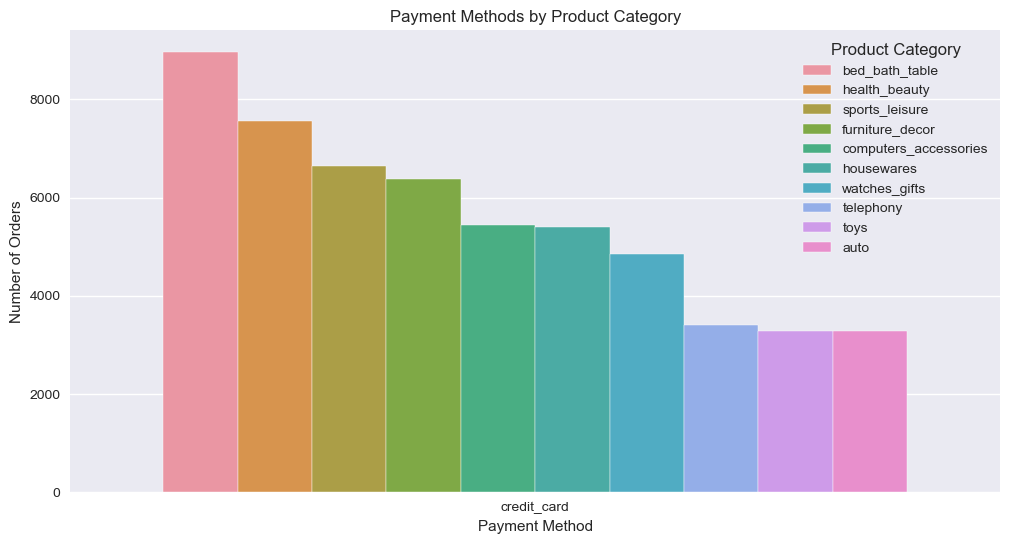

In [64]:
# Payment method by product category visualization

# Select the top 10 product categories
top_products_categories = sqldf(query).head(10)

# Convert the result to a DataFrame
top_products_categories_df = top_products_categories

# Payment method and product category visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_type', y='numb_orders', hue='product_category_name_english', data=top_products_categories_df)
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.title('Payment Methods by Product Category')
plt.legend(title='Product Category')
plt.show()

#### Changing the state name, from short to full for visualization

In [105]:
mapping = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapa',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceara',
    'DF': 'Distrito Federal',
    'ES': 'Espirito Santo',
    'GO': 'Goias',
    'MA': 'Maranhao',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Para',
    'PB': 'Paraiba',
    'PR': 'Parana',
    'PE': 'Pernambuco',
    'PI': 'Piaui',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondonia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'Sao Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

# Use the 'replace' method to replace the values in the column
customer_df1['customer_state'] = customer_df1['customer_state'].replace(mapping)

# Print the updated DataFrame
print(customer_df1)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city     customer_state  

In [106]:
# C) Payment method by customer state
query = '''
SELECT op.payment_type, c.customer_state, COUNT(DISTINCT op.order_id) AS numb_orders
FROM orderpayments_df5 op
JOIN orders_df3 o ON op.order_id = o.order_id
JOIN customer_df1 c ON o.customer_id = c.customer_id
GROUP BY 1, 2
ORDER BY 3 DESC;
'''
sqldf(query)

,payment_type,customer_state,numb_orders
0,credit_card,Sao Paulo,32074
1,credit_card,Rio de Janeiro,10253
2,credit_card,Minas Gerais,9030
3,boleto,Sao Paulo,8205
4,credit_card,Rio Grande do Sul,3967
...,...,...,...
101,debit_card,Rondonia,3
102,not_defined,Sao Paulo,3
103,voucher,Amapa,3
104,debit_card,Acre,2


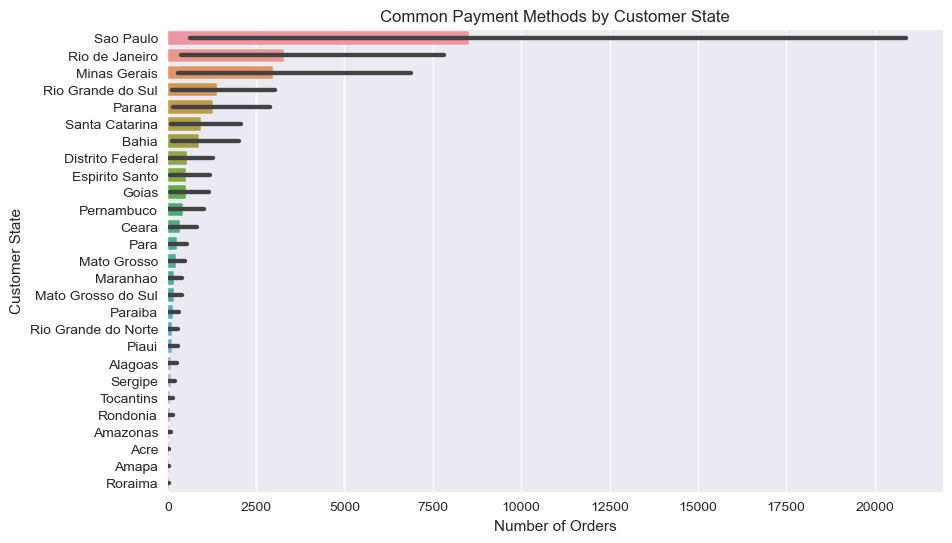

In [107]:
# Geographic region visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='numb_orders', y='customer_state', data=sqldf(query))
plt.xlabel('Number of Orders')
plt.ylabel('Customer State')
plt.title('Common Payment Methods by Customer State')
plt.show()

### 12: How do customer reviews and ratings affect sales and product performance on Olist?

The same conclusion can be derived from the solution provided for question number 6.

### 13: Which product categories have the highest profit margins on Olist, and how can the company increase profitability across different categories?

In [67]:
# Calculation for categories with highest profit margin

query = '''

SELECT product_category_name_english, ROUND ((SUM (payment_value) - SUM (price) + SUM (oi.freight_value)) / SUM (payment_value) *100, 2) AS profit_margin
FROM orderitems_df4 oi
JOIN orderpayments_df5 op ON oi.order_id = op.order_id
JOIN products_df6 p ON oi.product_id = p.product_id
JOIN productcategoryname_df8 pcn ON p.product_category_name = pcn.product_category_name
GROUP BY 1
ORDER BY 2 DESC;

'''
sqldf(query)

,product_category_name_english,profit_margin
0,home_comfort_2,79.43
1,signaling_and_security,78.03
2,diapers_and_hygiene,76.45
3,drinks,76.22
4,fixed_telephony,72.50
...,...,...
66,small_appliances,18.36
67,musical_instruments,17.92
68,computers,16.79
69,home_appliances_2,10.98


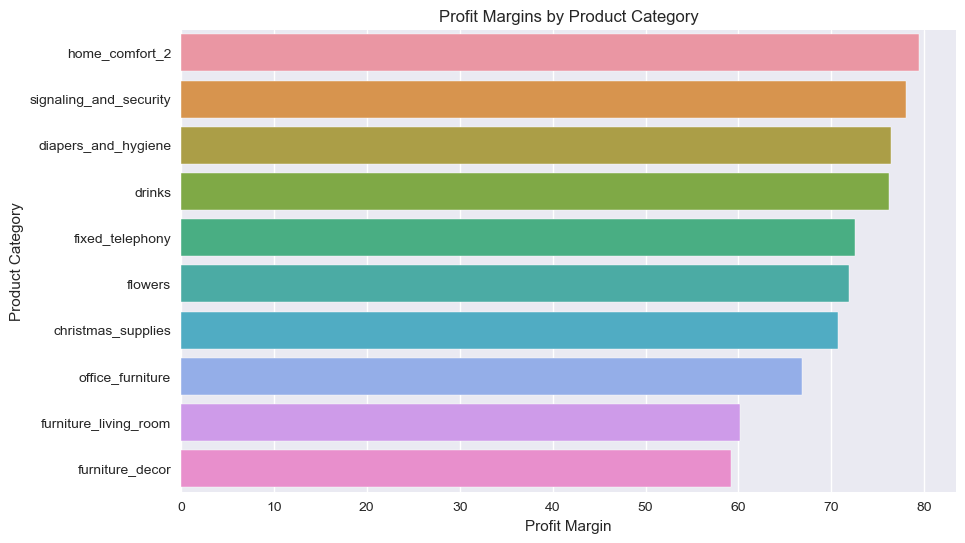

In [68]:
# Visualized the profit margin

# Select the top 10 product categories
top_products_categories = sqldf(query).head(10)

# Convert the result to a DataFrame
profit_margin_df = top_products_categories


plt.figure(figsize=(10, 6))
sns.barplot(x='profit_margin', y='product_category_name_english', data=profit_margin_df)
plt.xlabel('Profit Margin')
plt.ylabel('Product Category')
plt.title('Profit Margins by Product Category')
plt.show()

Based on the analysis, to increase profitability across different categories. This could involve strategies like adjusting pricing, optimizing the supply chain, improving product quality.

### 14: How does Olist's marketing spend and channel mix impact sales and customer acquisition costs, and how can the company optimize its marketing strategy to increase ROI?

In terms of the marketing Olist can analyze marketing spend by evaluating the amount of money allocated to different marketing channels such as online advertising, social media campaigns, influencer marketing, etc. Then assess the impact of each marketing channel on sales and customer acquisition costs.

Olist can optimize the marketing strategy based on the analysis, identify the most effective marketing channels and allocate resources accordingly. Olist can also shift budget allocation towards channels that yield higher ROI and optimize marketing campaigns to target the most profitable customer segments. 

Experiment with different marketing strategies, messaging, and promotions to improve the overall marketing performance and increase ROI.

### 15: Geolocation having high customer density. Calculate customer retention rate according to geolocations.

In [102]:
# Replacing the short form of the state names to to full

mapping1 = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapa',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceara',
    'DF': 'Distrito Federal',
    'ES': 'Espirito Santo',
    'GO': 'Goias',
    'MA': 'Maranhao',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Para',
    'PB': 'Paraiba',
    'PR': 'Parana',
    'PE': 'Pernambuco',
    'PI': 'Piaui',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondonia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'Sao Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

mapping2 = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapa',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceara',
    'DF': 'Distrito Federal',
    'ES': 'Espirito Santo',
    'GO': 'Goias',
    'MA': 'Maranhao',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Para',
    'PB': 'Paraiba',
    'PR': 'Parana',
    'PE': 'Pernambuco',
    'PI': 'Piaui',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondonia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'Sao Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

# Use the 'replace' method to replace the values in the column
geolocation_df2['geolocation_state'] = geolocation_df2['geolocation_state'].replace(mapping1)

customer_df1['customer_state'] = customer_df1['customer_state'].replace(mapping2)

# Print the updated DataFrame
print(geolocation_df2)

print(customer_df1)

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city  geolocation_state  
0              sao paulo          Sao Paulo  
1              sao 

In [126]:
#Geolocation having high customer density
query = '''

SELECT g.geolocation_state, COUNT(DISTINCT c.customer_unique_id) AS customer_count
FROM customer_df1 c
JOIN geolocation_df2 AS g ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
GROUP BY 1
ORDER BY 2 DESC;

'''
sqldf(query)

,geolocation_state,customer_count
0,Sao Paulo,40287
1,Rio de Janeiro,12372
2,Minas Gerais,11248
3,Rio Grande do Sul,5284
4,Parana,4871
5,Santa Catarina,3547
6,Bahia,3268
7,Espirito Santo,1959
8,Goias,1944
9,Distrito Federal,1913


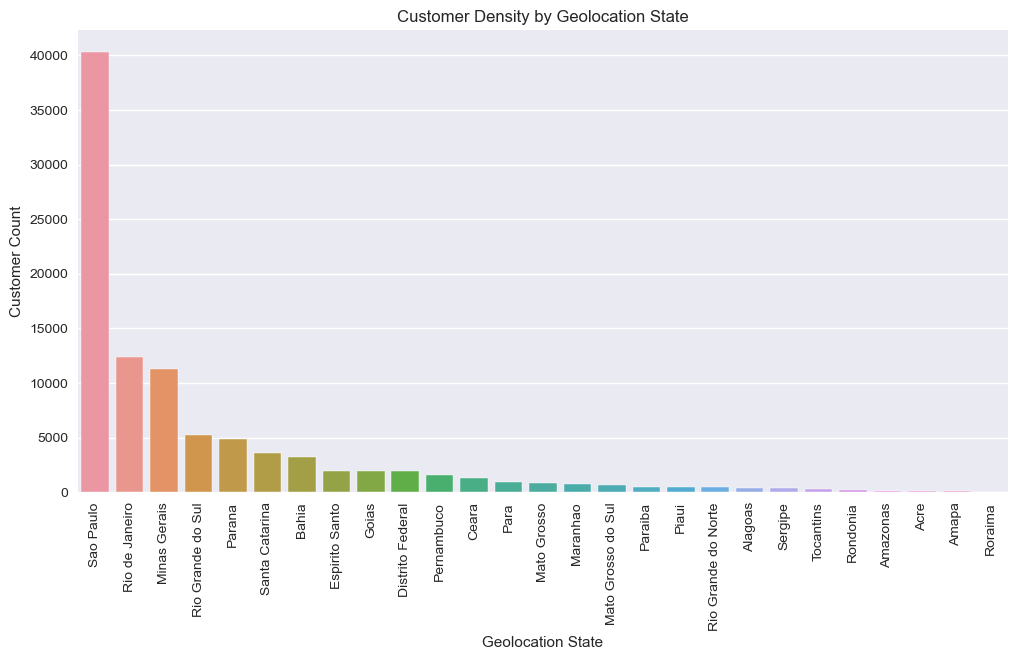

In [127]:
#visualizing
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sqldf(query), x='geolocation_state', y='customer_count')
plt.xlabel('Geolocation State')
plt.ylabel('Customer Count')
plt.title('Customer Density by Geolocation State')
plt.xticks(rotation=90)
plt.show()

In [112]:
# Customer retention according to location

query = ''' 

WITH returning_customers AS (
    SELECT c.customer_state, c.customer_unique_id, COUNT(DISTINCT o.order_id) AS OrderCount, ROUND(SUM(op.payment_value), 2) AS total_spent
    FROM orders_df3 o
    JOIN customer_df1 c ON o.customer_id = c.customer_id
    JOIN orderpayments_df5 op ON o.order_id = op.order_id
    GROUP BY c.customer_state, c.customer_unique_id
    HAVING COUNT(DISTINCT o.order_id) > 1
),
state_sales AS (
    SELECT rc.customer_state, COUNT(DISTINCT rc.customer_unique_id) AS numb_repeat_customers, 
           ROUND(SUM(rc.total_spent) / (SELECT SUM(payment_value) FROM orderpayments_df5), 2) * 100 AS repeat_cust_sales_perc
    FROM returning_customers rc
    GROUP BY rc.customer_state
),
total_customers AS (
    SELECT customer_state, COUNT(DISTINCT customer_id) AS total_cust
    FROM customer_df1
    GROUP BY customer_state
)
SELECT DISTINCT(rc.customer_state) AS state, 
       ROUND((CAST(ss.numb_repeat_customers AS FLOAT) / CAST(tc.total_cust AS FLOAT)) * 100, 2) AS retention_rate
FROM returning_customers rc
JOIN state_sales ss ON rc.customer_state = ss.customer_state
JOIN total_customers tc ON rc.customer_state = tc.customer_state
ORDER BY 2 DESC;

'''
sqldf(query)

,state,retention_rate
0,Acre,4.94
1,Rondonia,3.95
2,Rio de Janeiro,3.28
3,Mato Grosso,3.20
4,Goias,3.17
5,Sao Paulo,3.10
6,Rio Grande do Sul,3.06
7,Alagoas,2.91
8,Minas Gerais,2.91
9,Distrito Federal,2.90


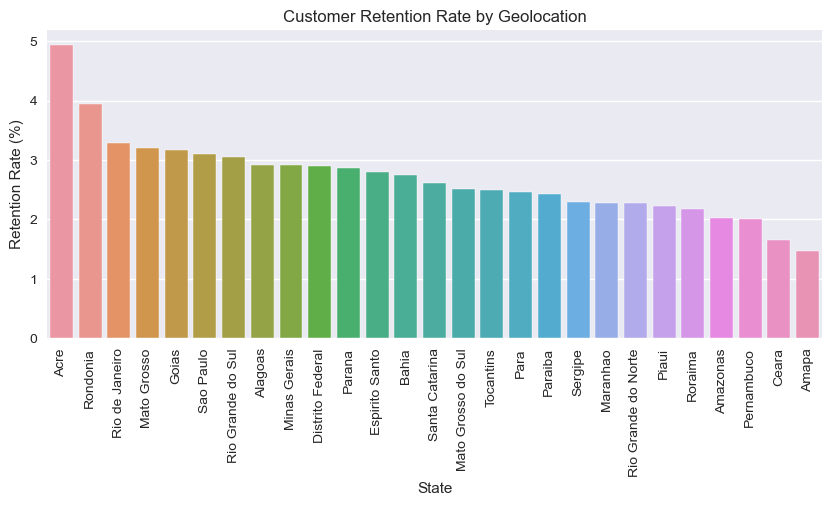

In [121]:
# Select the 27 states
customer_state = sqldf(query).head(27)

# Convert the result to a DataFrame
geo_retention_rate_df = customer_state

# plot
plt.figure(figsize=(10, 4))
sns.barplot(data=geo_retention_rate_df, x='state', y='retention_rate')
plt.xlabel('State')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Rate by Geolocation')
plt.xticks(rotation=90)
plt.show()

## Insights Summary:

* Olist generated a revenue of 15.87 Million Brazillian Real.


* The number of orders placed on Olist totals 98,207.


* Based on the chart, bed_bathe_table tops the list as the most popular product category with 11,115 sale volumes out of the 71 categories. It is followed by other popular categories such as health_beauty, sport_leisure, furniture_decor, computer_accessories.


* The average order value (AOV) is 153.44 Brazilian Real.


* The number of active sellers has witnessed a significant growth. In 2016, there were 145 sellers actively participating in the marketplace. The following year, in 2017, this number surged to 1784 sellers, indicating a substantial increase. However, it was in 2018 that the highest number of sellers was recorded, reaching a remarkable count of 2383.


* Seller ratings with 2 stars have more revenue than other stars and in that order its 4 stars, 5 stars, 1 star and 3 stars being the lowest. The reasons for lower-rated sellers having higher revenue may vary depending on the specific circumstances and dynamics of the marketplace.


* The total number of customers that made a repeat purchase is 2997, which accounts for 6% of total sales.
		

* The average customer rating is 4 and it significantly contributes to the overall revenue, securing the second-highest position. This particular rating category generates a substantial sum of 2,540,744, highlighting its notable impact on the company's sales performance.


* The average order cancellation rate on Olist is 0.63%, which is less than 1%. This suggests that the rate of order cancellations is relatively low, indicating a generally stable and reliable order fulfillment process on the platform.


* Bed bathe table is the top selling product in 2018 followed by watches gifts. While in 2017 health_beauty was the highest, seconded by computer accesories and lastly furniture decor. This result is based on the Top 5 by the revenue and year.


* The most commonly used payment methods by Olist customers include credit card, boleto, voucher, and debit card. Among these, credit card is the preferred payment method for top product categories such as bed bath table, health beauty, sports leisure, furniture decor, and computers accessories.


* The product categories with the highest profit margin are home comfort 2 with 79.43%, signaling and security 78.03%,    diapers and hygiene 76.45%, drinks 76.22%, fixed telephony 72.50%


* The product categories that yield the highest profit margins on Olist are home comfort 2 with a profit margin of 79.43%, signaling and security with 78.03%, diapers and hygiene with 76.45%, drinks with 76.22%, and fixed telephony with 72.50%.


* In terms of the marketing Olist can analyze marketing spend by evaluating the amount of money allocated to different marketing channels such as online advertising, social media campaigns, influencer marketing, etc. Then assess the impact of each marketing channel on sales and customer acquisition costs.


* Among the geolocations, Sao Paulo has the highest customer density, with 40,287 customers. It is followed by Rio de Janeiro, which has 12,372 customers, and Minas Gerais with 11,248 customers. In terms of customer retention rates, the top 5 locations are Acre with a rate of 4.94%, Rondonia with 3.95%, Rio de Janeiro with 3.28%, Mato Grosso with 3.20%, and Goias with 3.17%. Sao Paulo also has a significant retention rate of 3.10%.



## Recommendations:

*  Olist can Implement advanced algorithms and personalized recommendations to showcase those products bringing in a higher revenue to customers, increasing the likelihood of purchases.


* Even the the average cancelation rate is 0.63%. Olist should focus on providing exceptional customer service, ensuring prompt responses to queries, and hassle-free returns.


* Olist should introduce loyalty programs that reward repeat purchases, referrals, and engagement, encouraging customer loyalty and increasing customer lifetime value.


* Olist should continuously add new products and categories to to those sections that generate a high revenue to attract a wider customer base and cater to diverse preferences, increasing the chances of cross-selling and upselling.


## Summary:
 
 Here’s a summary of the step-by-step process followed for Analyzing the Olist dataset :


1. Knowing our data.

2. We have done data Observation, Preparation and Cleaning solution.

3. We have done Exploratory Analysis and Visualizations.

4. Answered the questions.

5. Summary and Recommendations.

#### Thank you for reading

[My Linkedin](https://www.linkedin.com/in/ubani-cj/)